In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler  

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model-save/model_open_high_low_epoc100.h5
/kaggle/input/model-save/minmaxsplit20bath8.h5
/kaggle/input/model-save/model_open_epoc100.h5
/kaggle/input/model-save/stund_split_10.h5
/kaggle/input/model-save/model_mlp_grid.pkl
/kaggle/input/model-save/model_stundscaler_split10.h5
/kaggle/input/winq22-process/submission_example.csv


In [2]:
#importando as bibliotecas
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plotar_testes(y_test,y_pred,modelo):
    #Predicted vs True Adj Close Value – LSTM
    plt.plot(y_test.values.ravel(), label='Valor real')
    plt.plot(y_pred, label= f'{modelo} predição')
    plt.xticks(range(0,y_test.shape[0],5000),y_test.index[::5000],rotation=45)
    plt.title(f'Predição usando {modelo}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor ação')
    plt.legend()
    plt.savefig(f"grafico {modelo}.png",dpi=300, bbox_inches='tight')
    plt.show()

def plotar_testes_1000(y_test,y_pred,tam,modelo):
    #Predicted vs True Adj Close Value – LSTM
    base = int(tam*0.1)
    plt.plot(y_test[-tam:-1].values.ravel(), label='Valor real')
    plt.plot(y_pred[-tam:-1], label= f'{modelo} predição')
    plt.xticks(range(0,y_test[-tam:-1].shape[0],base),y_test[-tam:-1].index[::base],rotation=45)
    plt.title(f'Predição usando {modelo}')
    plt.xlabel('Tempo')
    plt.ylabel('Valor ação')
    plt.legend()
    plt.savefig(f"{modelo}-1000.png",dpi=300, bbox_inches='tight')
    plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


def erros(y_test, y_pred):
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"MAPE: {mape*100:.5f}%")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse:.2f}")

In [4]:
data = pd.read_csv("../input/winq22-process/submission_example.csv",
                  #skiprows = range(30001, 3119977), # ignora as primeiras 10 linhas do excel
                  )
df = pd.DataFrame(data)
# df = df.reset_index()
#Colocando data como índice
df.index = df.Date
df.drop('Date', axis=1, inplace=True)

df.dtypes

#criando novos campos de medias móveis
df['mm5d'] = df['Close'].rolling(5).mean()
df['mm21d'] = df['Close'].rolling(21).mean()

df.head(22)

#retirando os dados nulos
df.dropna(inplace=True)
df

features = df.loc[:,['Open', 'Hight', 'Low', 'Ticket','Volume','mm5d','mm21d']]
y_output = df['Close']

In [5]:
# #Empurrando para frente os valores das ações
# df['Close'] = df['Close'].shift(-1)

# df.head()

In [6]:
# #verificando quantidade de linhas
# qtd_linhas = len(df)

# qtd_linhas_treino= round(.70 * qtd_linhas)
# qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
# qtd_linhas_validacao = qtd_linhas -1

# info = (
#     f"linhas treino= 0:{qtd_linhas_treino}"
#     f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
#     f" linhas validação= {qtd_linhas_validacao}"
# )

# info

In [7]:
# #Escolhendo as melhores features com Kbest

# features_list = ('Open', 'Hight', 'Low', 'Ticket','Volume','mm5d','mm21d')

# k_best_features = SelectKBest(k='all')
# k_best_features.fit_transform(features, labels)
# k_best_features_scores = k_best_features.scores_
# raw_pairs = zip(features_list[1:], k_best_features_scores)
# ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

# k_best_features_final = dict(ordered_pairs[:15])
# best_features = k_best_features_final.keys()
# print ('')
# print ("Melhores features:")
# print (k_best_features_final)

In [8]:
# features = df.loc[:,['Open', 'Hight', 'Low', 'Ticket','Volume','mm5d','mm21d']]
# labels = df['Close']

# features

In [9]:
# #variavel de predição - saida
# y_saida = ['Close']
# #escolhendo as features de entrada
# features = ['Open', 'Hight', 'Low', 'Ticket','Volume','mm5d','mm21d']

In [10]:
# scaler = MinMaxScaler()
# feature_transform = scaler.fit_transform(df[features])
# feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
# y_output =  pd.DataFrame(columns=y_saida, data=(df[y_saida]), index=df.index)
# feature_transform.head()

In [11]:
split_percentage = 0.7
split = int(split_percentage*len(df))
  
# Train data set
X_train = features[:split]
y_train = y_output[:split]
  
# Test data set
X_test = features[split:]
y_test = y_output[split:]

print( len(X_train), len(y_train))
print( len(X_test), len(y_test))

110222 110222
47238 47238


In [12]:
# #verificando quantidade de linhas
# qtd_linhas = len(df)

# qtd_linhas_treino= round(.70 * qtd_linhas)
# qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
# qtd_linhas_validacao = qtd_linhas -1

# info = (
#     f"linhas treino= 0:{qtd_linhas_treino}"
#     f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
#     f" linhas validação= {qtd_linhas_validacao}"
# )

# info

In [13]:
# #Separa os dados de treino teste e validação
# X_train = features[:qtd_linhas_treino]
# X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

# y_train = labels[:qtd_linhas_treino]
# y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

# print( len(X_train), len(y_train))
# print( len(X_test), len(y_test))

In [14]:
# # Normalizando os dados de entrada(features)

# # Gerando o novo padrão
# scaler = StandardScaler()
# X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
# X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [15]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

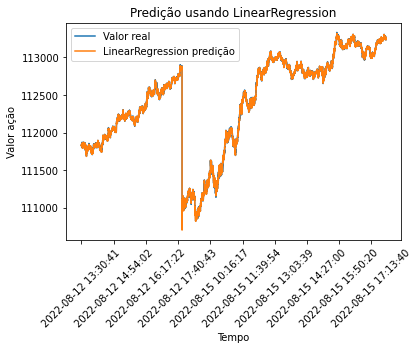

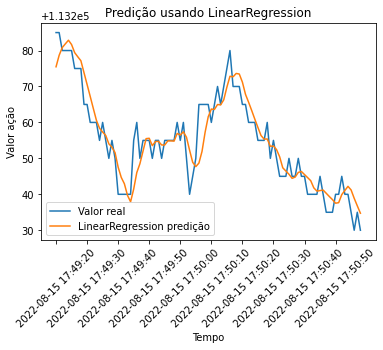

MAPE: 0.00404%
MSE: 101.14


In [16]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred= lr.predict(X_test_scale)
cd =r2_score(y_test, y_pred)

f'Coeficiente de determinação:{cd * 100:.2f}'
plotar_testes(y_test,y_pred,'LinearRegression')
plotar_testes_1000(y_test,y_pred,100,'LinearRegression')
erros(y_test, y_pred)


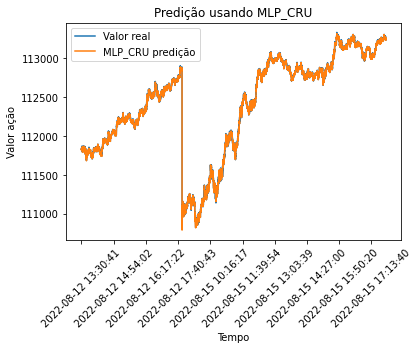

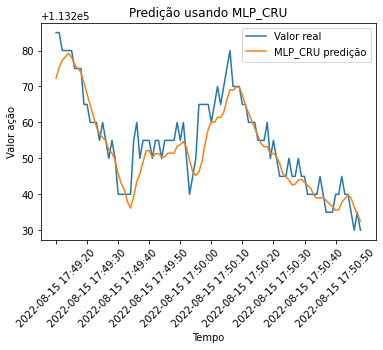

MAPE: 0.00441%
MSE: 101.60


['model_mlp_cru.pkl']

In [17]:
'Coeficiente de determinação:95.39'
#rede neural cru
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train_scale, y_train)
y_pred= rn.predict(X_test_scale)

cd = rn.score(X_test_scale, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

plotar_testes(y_test,y_pred,'MLP_CRU')
plotar_testes_1000(y_test,y_pred,100,'MLP_CRU')
erros(y_test, y_pred)

import joblib

# save your model or results
joblib.dump(rn, 'model_mlp_cru.pkl')

MLPRegressor(hidden_layer_sizes=100, max_iter=1000, random_state=42)


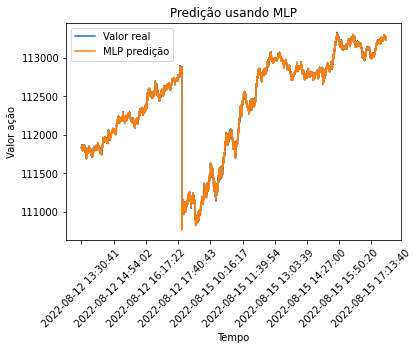

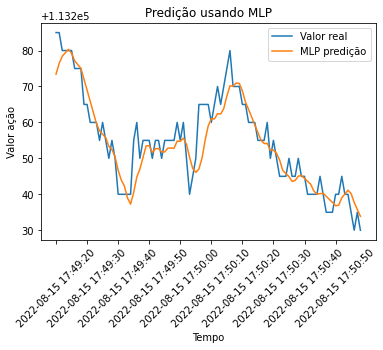

MAPE: 0.00417%
MSE: 96.48


In [18]:
#rede neural com ajuste hyper parameters

# rn = MLPRegressor()

# parameter_space = {
#         'hidden_layer_sizes': [100,],
#         'activation': ['relu'],
#         'solver': [ 'adam'], 
#         'alpha': [0.0001],
#         'learning_rate': ['constant'],
#         'max_iter':[100,90,50,200],
#         'random_state':[42]
#     }

# search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


# search.fit(X_train_scale,y_train)
import joblib

search = joblib.load("../input/model-save/model_mlp_grid.pkl")

clf = search.best_estimator_
print(clf)
y_pred= search.predict(X_test_scale)
cd = search.score(X_test_scale, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#executando a previsão

plotar_testes(y_test,y_pred,'MLP')
plotar_testes_1000(y_test,y_pred,100,'MLP')
erros(y_test, y_pred)

In [19]:
import joblib

# save your model or results
joblib.dump(search, 'model_mlp_ruim.pkl')

# #load your model for further usage
# search = joblib.load("../input/model-save/model_mlp_grid.pkl")
# print(search)

['model_mlp_ruim.pkl']

In [20]:
# import joblib

# search = joblib.load("../input/model-save/model_mlp_grid.pkl")
# print(search)

In [21]:
# from keras.models import load_model
# model = load_model('../input/model-save/model_open_high_low_epoc100.h5')